In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [138]:
im = cv.imread(filename='./data/napoleon.png') # read an image from a given path
print('Napoleon.png')
print(type(im)) # <class 'numpy.ndarray'>
print(f'Shape: {im.shape}') # (368, 445, 3)
print(f'dtype: {im.dtype}') # uint 8
print(f'Max intensity value: {np.max(im)}, Min intensity value: {np.min(im)}') 

Napoleon.png
<class 'numpy.ndarray'>
Shape: (368, 445, 3)
dtype: uint8
Max intensity value: 254, Min intensity value: 0


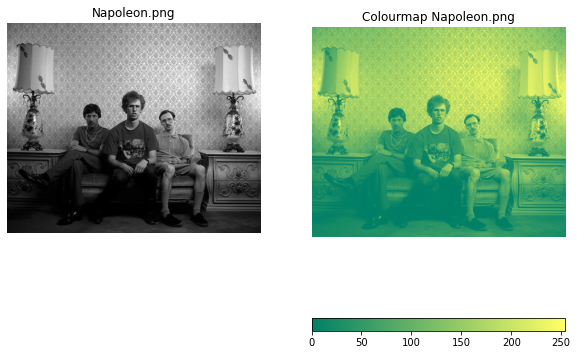

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10)) # create a figure and axis objects

ax1.axis('off')
ax1.set_title('Napoleon.png')
implot = ax1.imshow(im)

ax2.axis('off')
ax2.set_title('Colourmap Napoleon.png')
implot = ax2.imshow(im[:,:,0], cmap=cm.summer) # colour mapping only makes sense when working with a single channel
fig.colorbar(implot, orientation='horizontal') # add colourbar to axis of choice

plt.show() # show figure

In [63]:
cv.imwrite(filename='./data/my_napoleon.png', img=im) # save an image to a given path
fig.savefig(fname='./data/napoleon_figure.png') # save a figure to a given path

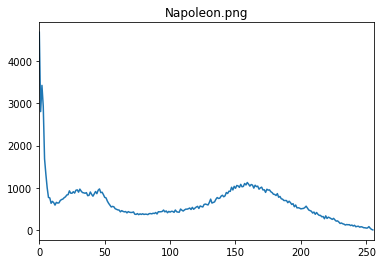

Napoleon_light.png
Shape: (368, 445, 3)
dtype: uint8
Max intensity value: 230, Min intensity value: 103


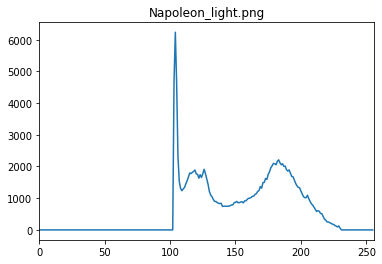

Napoleon_dark.png
Shape: (368, 445, 3)
dtype: uint8
Max intensity value: 152, Min intensity value: 25


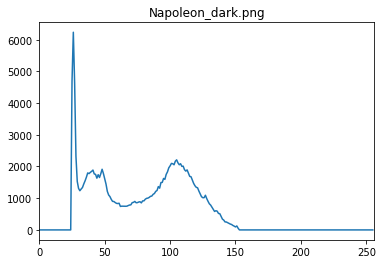

In [105]:
hist = cv.calcHist(images=[im], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Napoleon.png')
plt.show()

im_light = cv.imread(filename='./data/napoleon_light.png')
print('Napoleon_light.png')
print(f'Shape: {im_light.shape}')
print(f'dtype: {im_light.dtype}')
print(f'Max intensity value: {np.max(im_light)}, Min intensity value: {np.min(im_light)}') 

hist = cv.calcHist(images=[im_light], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Napoleon_light.png')
plt.show()

im_dark = cv.imread(filename='./data/napoleon_dark.png')
print('Napoleon_dark.png')
print(f'Shape: {im_dark.shape}')
print(f'dtype: {im_dark.dtype}')
print(f'Max intensity value: {np.max(im_dark)}, Min intensity value: {np.min(im_dark)}') 

hist = cv.calcHist(images=[im_dark], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Napoleon_dark.png')
plt.show()

In [118]:
# Division of a numpy array of dtype = uint8 by an integer to assess whether it keeps the precision
division_im = (im/64)*64
if np.array_equal(a1=im, a2=division_im):
    print('The division of an uint8 value by an integer keeps the precision.')
else:
    print('The division of an uint8 value by an integer does NOT keep the precision.')

The division of an uint8 value by an integer keeps the precision.


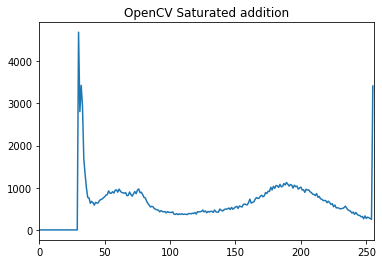

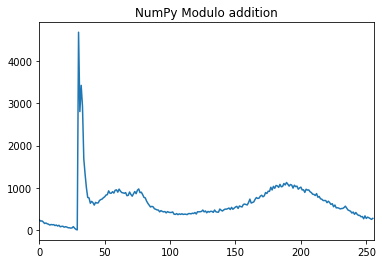

In [132]:
im_bright = cv.add(im,30)
hist = cv.calcHist(images=[im_bright], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.title('OpenCV Saturated addition')
plt.xlim([0,256])
plt.show()

im_bright = im + 30
hist = cv.calcHist(images=[im_bright], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.title('NumPy Modulo addition')
plt.xlim([0,256])
plt.show()

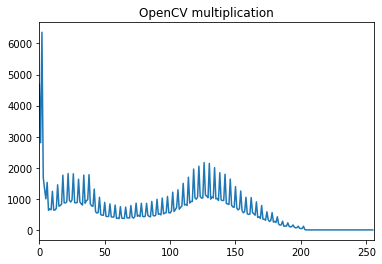

In [141]:
im_lowerContrast = cv.multiply(im, 0.8)
hist = cv.calcHist(images=[im_lowerContrast], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.title('OpenCV multiplication')
plt.xlim([0,256])
plt.show()